              year  seat_comfort  food_and_beverages  inflight_entertainment  \
count  4738.000000   4738.000000         4738.000000             4738.000000   
mean   2019.060785      3.011397            3.384762                3.463487   
std       2.614508      1.150431            1.383852                1.300702   
min    2015.000000      1.000000            1.000000                1.000000   
25%    2017.000000      2.000000            2.000000                3.000000   
50%    2018.000000      3.000000            4.000000                4.000000   
75%    2021.000000      4.000000            4.000000                4.000000   
max    2025.000000      5.000000            5.000000                5.000000   

       value_for_money  customer_service  
count      4738.000000       4738.000000  
mean          3.048755          3.453356  
std           1.148076          1.093882  
min           1.000000          1.000000  
25%           3.000000          3.000000  
50%           3.00000

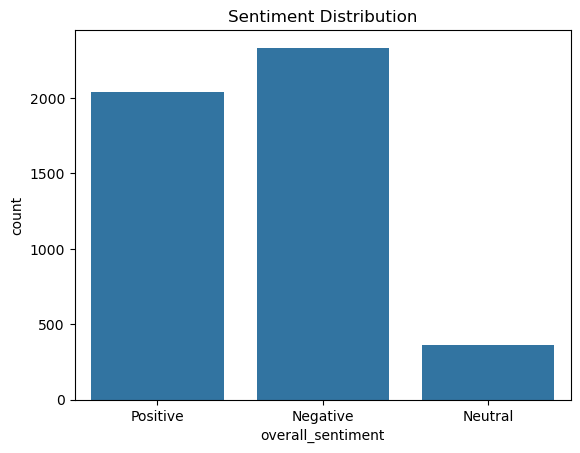

                   seat_comfort  food_and_beverages  inflight_entertainment  \
overall_sentiment                                                             
Negative               2.452014            2.580977                2.753213   
Neutral                3.011050            3.439227                3.552486   
Positive               3.650833            4.293830                4.259549   

                   value_for_money  customer_service  
overall_sentiment                                     
Negative                  2.436161          2.949015  
Neutral                   3.058011          3.475138  
Positive                  3.747307          4.025955  


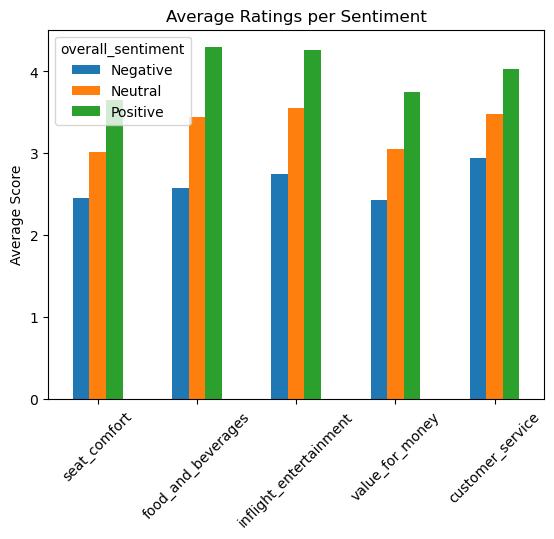

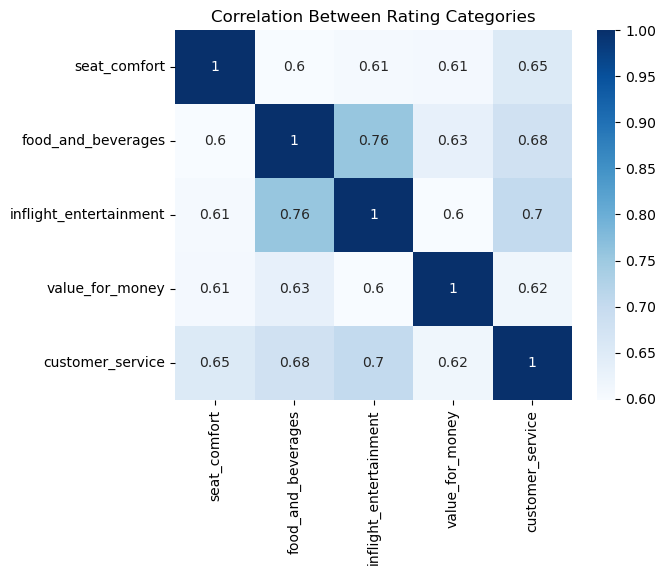

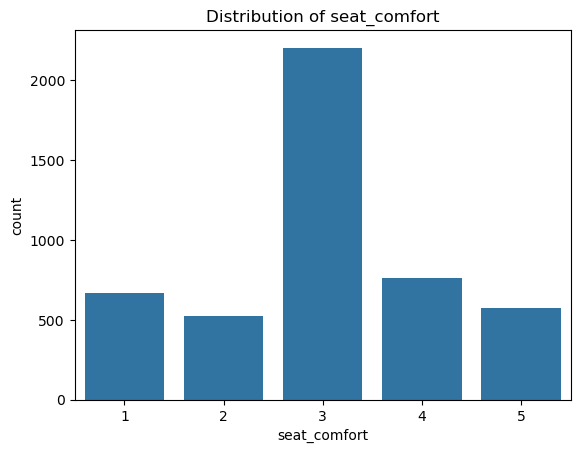

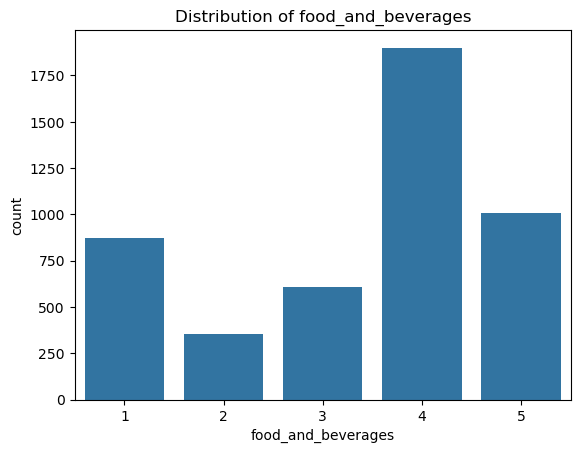

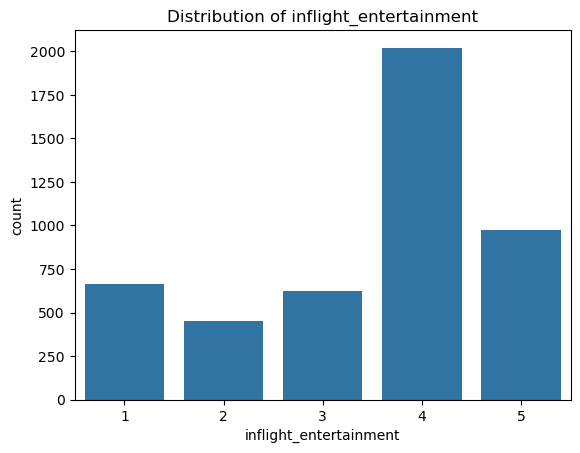

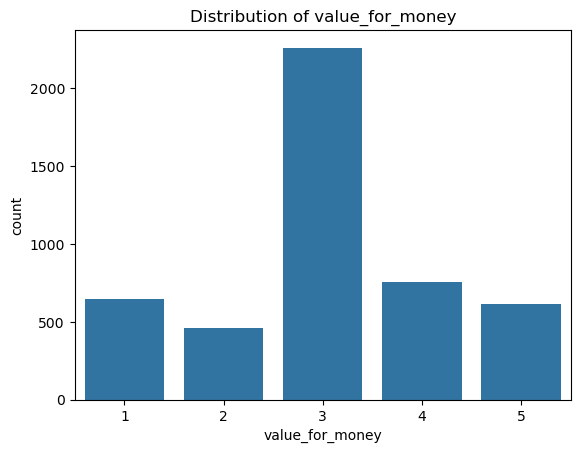

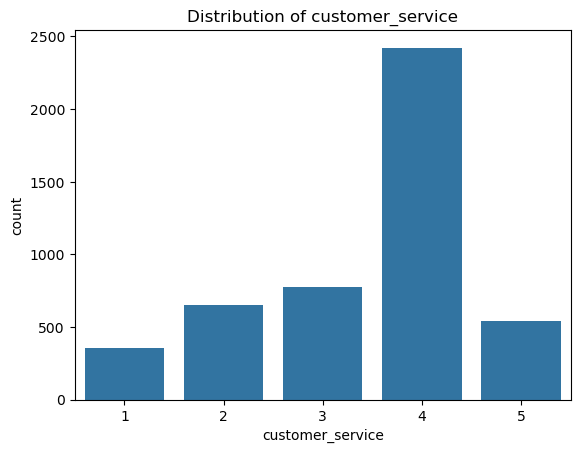

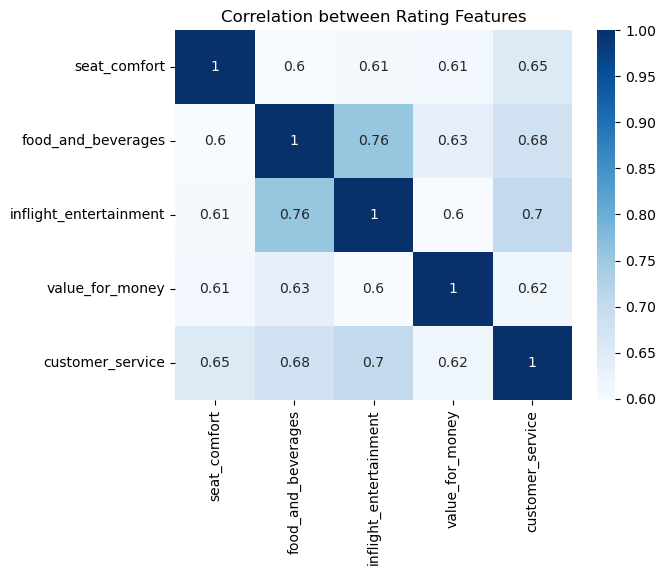

                seat_comfort  food_and_beverages  inflight_entertainment  \
source                                                                     
AirlineQuality      2.816742            2.744344                2.380090   
TripAdvisor         3.031425            3.450652                3.574953   

                value_for_money  customer_service  
source                                             
AirlineQuality         2.710407          2.680995  
TripAdvisor            3.083566          3.532821  


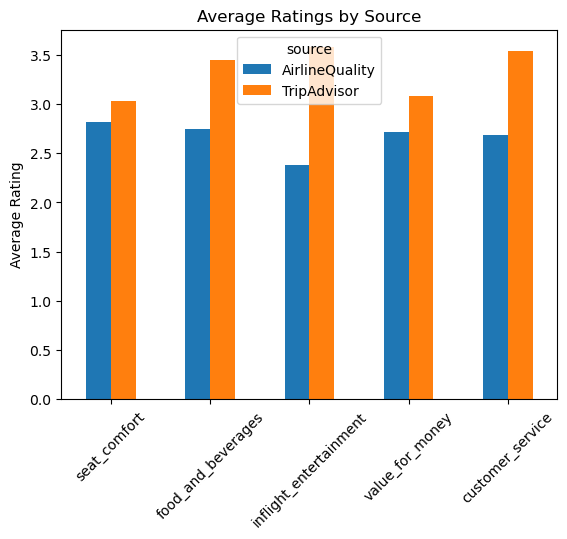

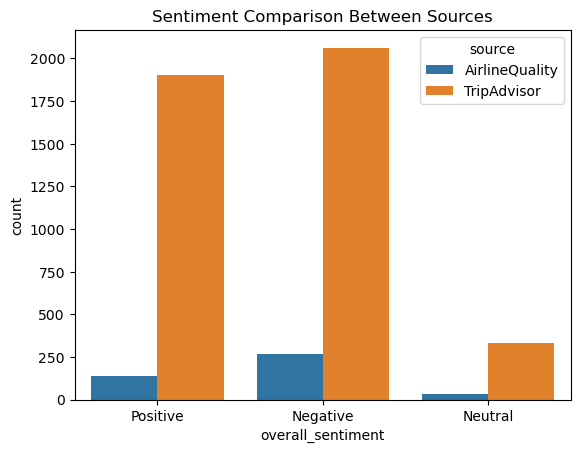

source
AirlineQuality    1.708145
TripAdvisor       1.962058
Name: sentiment_score, dtype: float64


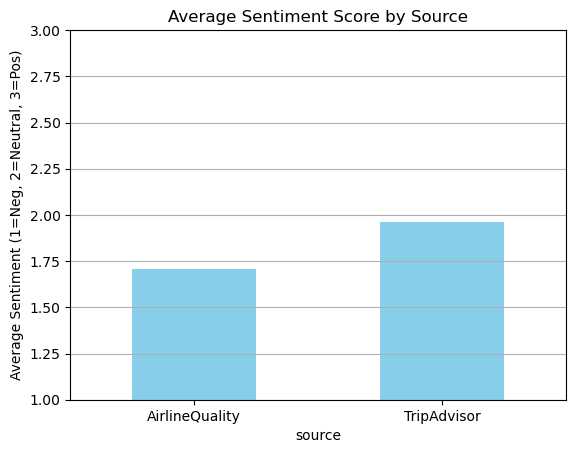

Overall Average Ratings:
 seat_comfort              3.011397
food_and_beverages        3.384762
inflight_entertainment    3.463487
value_for_money           3.048755
customer_service          3.453356
dtype: float64


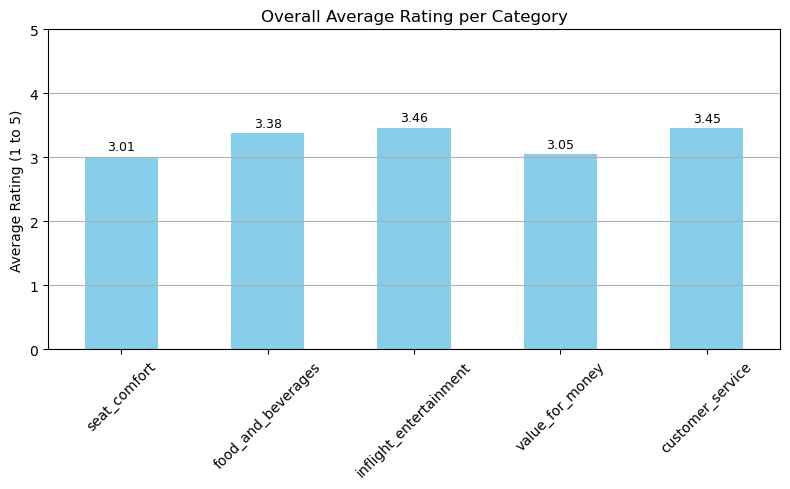

                seat_comfort  food_and_beverages  inflight_entertainment  \
source                                                                     
AirlineQuality      2.816742            2.744344                2.380090   
TripAdvisor         3.031425            3.450652                3.574953   

                value_for_money  customer_service  
source                                             
AirlineQuality         2.710407          2.680995  
TripAdvisor            3.083566          3.532821  


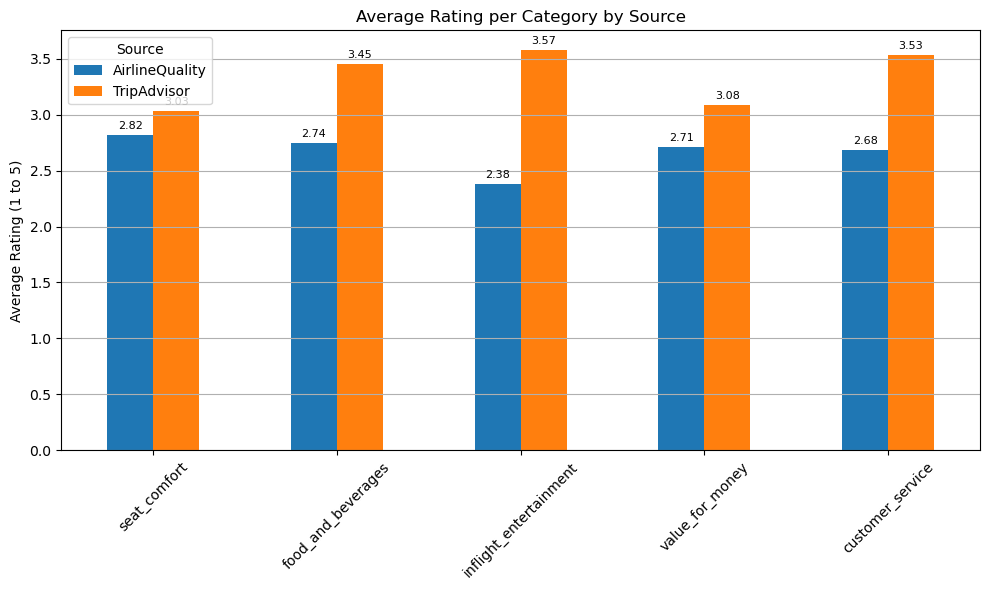

                seat_comfort  food_and_beverages  inflight_entertainment  \
source                                                                     
AirlineQuality      2.816742            2.744344                2.380090   
TripAdvisor         3.031425            3.450652                3.574953   

                value_for_money  customer_service  
source                                             
AirlineQuality         2.710407          2.680995  
TripAdvisor            3.083566          3.532821  


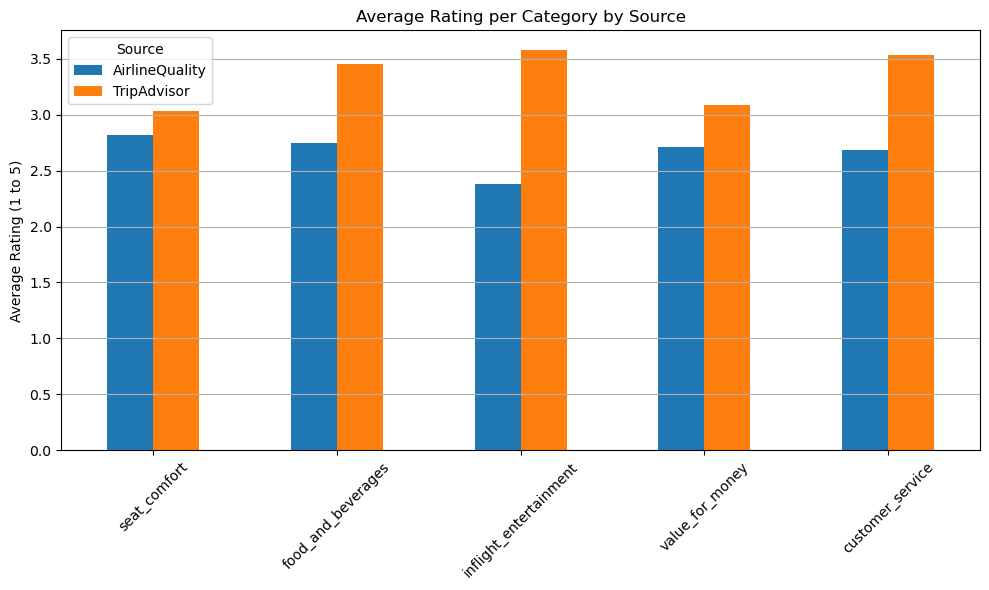

Sentiment counts:
overall_sentiment
negative    2334
positive    2042
neutral      362
Name: count, dtype: int64


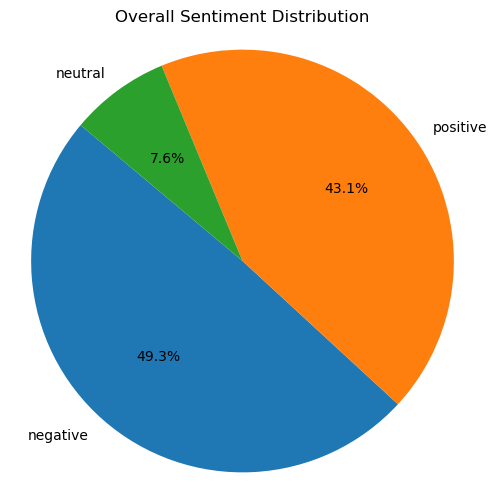

Sentiment counts for AirlineQuality:
overall_sentiment
negative    270
positive    141
neutral      31
Name: count, dtype: int64



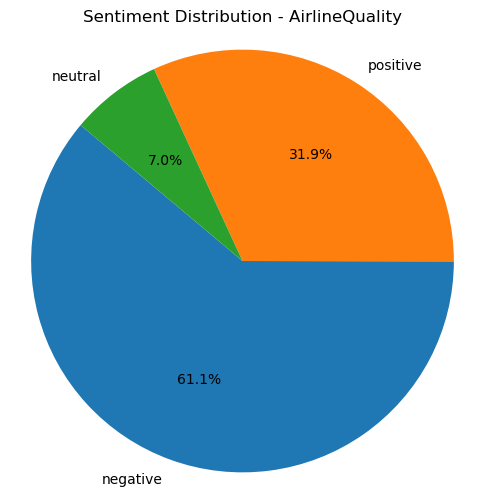

Sentiment counts for TripAdvisor:
overall_sentiment
negative    2064
positive    1901
neutral      331
Name: count, dtype: int64



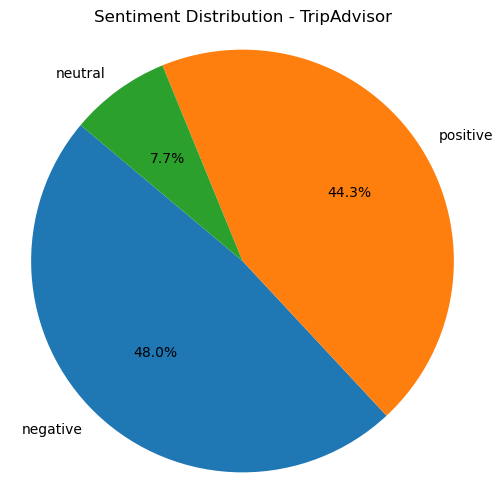

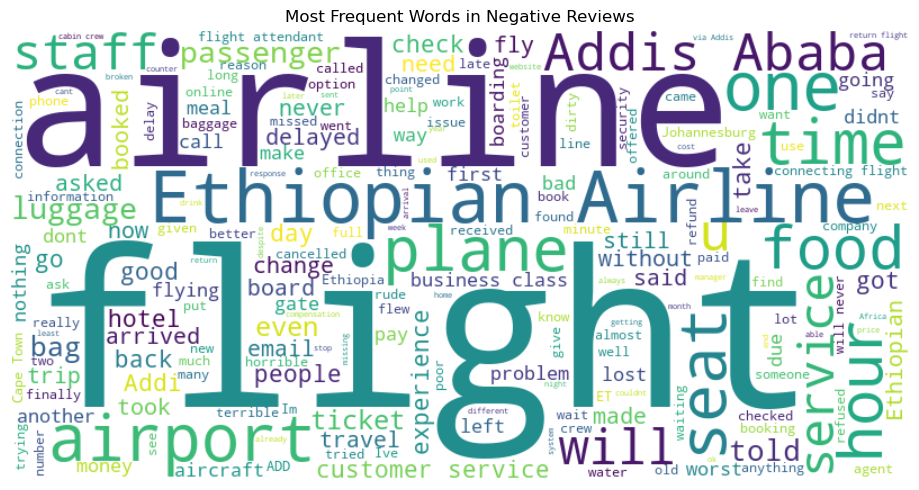

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load Data

file_path = "../datasets/labeled_data/ethiopian_airlines_overall_sentiment_final.csv"
df = pd.read_csv(file_path)

# Step 2: Basic Overview

print(df.describe())

# Step 3: Check Sentiment Distribution
sns.countplot(x='overall_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Step 4: Average Rating per Sentiment
rating_cols = ['seat_comfort', 'food_and_beverages', 'inflight_entertainment', 'value_for_money', 'customer_service']
mean_ratings = df.groupby('overall_sentiment')[rating_cols].mean()
print(mean_ratings)

# Step 5: Visualize Average Ratings by Sentiment
mean_ratings.T.plot(kind='bar')
plt.title("Average Ratings per Sentiment")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


# Step 6: Correlation Between Ratings
sns.heatmap(df[rating_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Rating Categories")
plt.show()

import seaborn as sns
rating_cols = ['seat_comfort', 'food_and_beverages', 'inflight_entertainment', 'value_for_money', 'customer_service']

for col in rating_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


sns.heatmap(df[rating_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation between Rating Features")
plt.show()



# 1. Average ratings per source
avg_by_source = df.groupby('source')[rating_cols].mean()
print(avg_by_source)
avg_by_source.T.plot(kind='bar')
plt.title("Average Ratings by Source")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='overall_sentiment', hue='source', data=df)
plt.title("Sentiment Comparison Between Sources")
plt.show()

# Map sentiments to numeric values
sentiment_map = {
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3
}
df['sentiment_score'] = df['overall_sentiment'].map(sentiment_map)

avg_sentiment_by_source = df.groupby('source')['sentiment_score'].mean()
print(avg_sentiment_by_source)
avg_sentiment_by_source.plot(kind='bar', color='skyblue')
plt.title("Average Sentiment Score by Source")
plt.ylabel("Average Sentiment (1=Neg, 2=Neutral, 3=Pos)")
plt.ylim(1, 3)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

import matplotlib.pyplot as plt

rating_cols = [
    'seat_comfort',
    'food_and_beverages',
    'inflight_entertainment',
    'value_for_money',
    'customer_service'
]

# Calculate overall average across all sources
overall_avg = df[rating_cols].mean()
print("Overall Average Ratings:\n", overall_avg)

# Plot
ax = overall_avg.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Overall Average Rating per Category")
plt.ylabel("Average Rating (1 to 5)")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Add text labels on bars
for i, val in enumerate(overall_avg):
    ax.text(i, val + 0.05, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()


import matplotlib.pyplot as plt

rating_cols = [
    'seat_comfort',
    'food_and_beverages',
    'inflight_entertainment',
    'value_for_money',
    'customer_service'
]

# Calculate average ratings by source
avg_ratings_by_source = df.groupby('source')[rating_cols].mean()
print(avg_ratings_by_source)

# Plot
ax = avg_ratings_by_source.T.plot(kind='bar', figsize=(10, 6))
plt.title("Average Rating per Category by Source")
plt.ylabel("Average Rating (1 to 5)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Source")
plt.tight_layout()

# Add text labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=3)

plt.show()

rating_cols = [
    'seat_comfort',
    'food_and_beverages',
    'inflight_entertainment',
    'value_for_money',
    'customer_service'
]

avg_ratings_by_source = df.groupby('source')[rating_cols].mean()
print(avg_ratings_by_source)

avg_ratings_by_source.T.plot(kind='bar', figsize=(10, 6))
plt.title("Average Rating per Category by Source")
plt.ylabel("Average Rating (1 to 5)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title="Source")
plt.tight_layout()
plt.show()


df['overall_sentiment'] = df['overall_sentiment'].str.lower()

# Count overall sentiment
overall_counts = df['overall_sentiment'].value_counts()

# Print the count for each sentiment
print("Sentiment counts:")
print(overall_counts)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(overall_counts, labels=overall_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Overall Sentiment Distribution")
plt.axis('equal')
plt.show()

sources = df['source'].unique()

for src in sources:
    src_counts = df[df['source'] == src]['overall_sentiment'].value_counts()
    
    # Print the counts for this source
    print(f"Sentiment counts for {src}:")
    print(src_counts)
    print()  # for spacing

    # Pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(src_counts, labels=src_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Sentiment Distribution - {src}")
    plt.axis('equal')
    plt.show()

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# (Optional) Load your DataFrame if not already loaded
# df = pd.read_csv("your_reviews_data.csv")

# Filter negative reviews and prepare text
negative_reviews = df[df['overall_sentiment'].str.lower() == 'negative']['review_comment'].dropna()
negative_text = " ".join(negative_reviews.astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Negative Reviews')
plt.tight_layout()
plt.show()

